# Netflix Project


## Importing Libraries , Loading the data and Basic Observations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://github.com/bryan-HKUST/Business-Analytics/raw/main/Python/Netflix/Netflix_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df['show_id'].is_unique,  df['title'].is_unique

(True, True)

In [6]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## Data Cleaning

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [9]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [10]:
ind = df[df['duration'].isna()].index
ind

Index([5541, 5794, 5813], dtype='int64')

In [11]:
df.loc[df['duration'].isna()] = df.loc[df['duration'].isna()].ffill(axis=1)

In [12]:
df.loc[ind ,'rating'] = 'Not Available'

In [13]:
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


In [14]:
df['release_year'].dtype

dtype('O')

In [15]:
df['release_year'] = df['release_year'].astype(np.int16)

In [16]:
df.loc[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [17]:
ind = df.loc[df.rating.isna()].index
ind

Index([5989, 6827, 7312, 7537], dtype='int64')

In [18]:
df.loc[ind , 'rating'] = 'Not Available'

In rating column , NR (Not rated) is same as UR (Unrated). Change UR to NR.

In [19]:
df.loc[df['rating'] == 'UR' , 'rating'] = 'NR'
df.rating.value_counts()

rating
TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 83
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
Name: count, dtype: int64

In [20]:
df.drop(df.loc[df['date_added'].isna()].index, axis=0, inplace=True)

In [21]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8797, dtype: object

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [23]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [24]:
df[['date_added' , 'year_added' , 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int32         
 2   month_added  8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


In [25]:
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64

In [26]:
(df.isna().sum()/df.shape[0]).map("{:.2%}".format)

show_id          0.00%
type             0.00%
title            0.00%
director        29.83%
cast             9.38%
country          9.44%
date_added       0.00%
release_year     0.00%
rating           0.00%
duration         0.00%
listed_in        0.00%
description      0.00%
year_added       0.00%
month_added      0.00%
dtype: object

## Data Exploration 

In [27]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [28]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show'] 

In [29]:
movies.shape[0], tv_shows.shape[0]

(6131, 2666)

In [30]:
movies.duration.unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [31]:
tv_shows.duration.unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [32]:
movies.loc[:,'duration'] = movies['duration'].str[:-4]
movies['duration']
# movies['duration'].str[:-4].str.endswith(' ')

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: object

In [33]:
movies.loc[:,'duration'] = movies['duration'].astype('int16')

In [34]:
tv_shows.loc[:,'duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows.loc[:,'duration'] = tv_shows['duration'].astype(np.int16)

In [35]:
tv_shows.rename(columns={'duration': 'duration_in_seasons'}, inplace = True)
movies.rename(columns={'duration': 'duration_in_minutes'}, inplace = True)

In [36]:
timeperiod = pd.Series((df['date_added'].min().strftime('%B %Y') , df['date_added'].max().strftime('%B %Y')))
timeperiod.index = ['First' , 'Most Recent']
timeperiod

First            January 2008
Most Recent    September 2021
dtype: object

In [37]:
df.release_year.min() , df.release_year.max() 

(1925, 2021)

In [38]:
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 78
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
TV Show  NR                  4
         Not Available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

In [39]:
df['country'].value_counts()

country
United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

We can use explode function in pandas to split the country column into different rows.
Create a separate table for country , to avoid duplicating records in our origional table after exploding.

In [40]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb = country_tb.dropna()

In [41]:
# Values with commas will be split into multiple list elements
# Values without commas will become single-element lists containing the original value
country_tb.loc[:,'country'] = country_tb['country'].apply(lambda x : x.split(','))

country_tb = country_tb.explode('country')
country_tb

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [42]:
country_tb.loc[:,'country'] = country_tb['country'].str.strip()

In [43]:
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [44]:
country_tb = country_tb.loc[country_tb['country'] != '']

In [45]:
country_tb['country'].nunique()

122

In [46]:
x = country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()
x['number_of_shows'] = x['show_id']
del x['show_id']
x['number_of_shows'].sum()

10003

In [47]:
x = x.pivot(index = ['country'] , columns = 'type' , values = 'number_of_shows').sort_values(['Movie','TV Show'],ascending = [False,False])
x

type,Movie,TV Show
country,,
United States,2752.0,932.0
India,962.0,84.0
United Kingdom,534.0,271.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


In [48]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [49]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb = dir_tb.dropna()

In [50]:
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb = dir_tb.explode('director')
dir_tb['director'] = dir_tb['director'].str.strip()

In [51]:
dir_tb.loc[dir_tb['director']=='']
# dir_tb.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

,show_id,type,director


In [52]:
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [53]:
dir_tb['director'].nunique()

4993

In [54]:
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values(by=['Movie','TV Show'] ,ascending = [False, False])

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


In [55]:
genre_tb = df[['show_id' , 'type', 'listed_in']]

In [56]:
genre_tb.loc[:,'listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()

In [57]:
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [58]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [59]:
genre_tb.listed_in.nunique()

42

In [60]:
genre_tb.groupby('type')['listed_in'].nunique()

type
Movie      20
TV Show    22
Name: listed_in, dtype: int64

In [61]:
# total movies/TV shows in each genre
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index().fillna(0)

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,0.0
Anime Features,71.0,0.0
Anime Series,0.0,175.0
British TV Shows,0.0,252.0
Children & Family Movies,641.0,0.0
Classic & Cult TV,0.0,26.0
Classic Movies,116.0,0.0
Comedies,1674.0,0.0
Crime TV Shows,0.0,469.0


In [62]:
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb = cast_tb.dropna()
cast_tb.loc[:,'cast'] = cast_tb['cast'].apply(lambda x : x.split(','))
cast_tb = cast_tb.explode('cast')
cast_tb

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [63]:
cast_tb['cast'] = cast_tb['cast'].str.strip()
cast_tb[cast_tb['cast'] == '']

,show_id,type,cast


In [64]:
# Total actors on the Netflix
cast_tb.cast.nunique()

36403

In [65]:
# Total movies/TV shows by each actor
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_index().fillna(0)

type,Movie,TV Show
cast,,
"""Riley"" Lakdhar Dridi",1.0,0.0
'Najite Dede,1.0,1.0
2 Chainz,0.0,1.0
2Mex,1.0,0.0
4Minute,1.0,0.0
...,...,...
Şevket Çoruh,1.0,0.0
Şinasi Yurtsever,3.0,0.0
Şükran Ovalı,1.0,0.0


## Visual Analysis

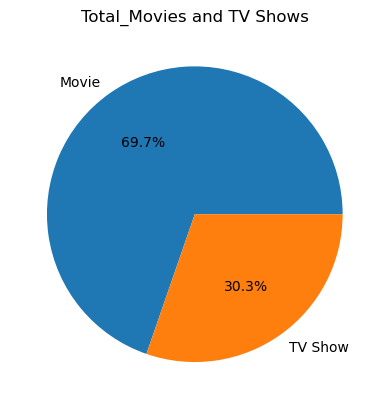

In [66]:
import matplotlib.cm as cm

types = df.type.value_counts()
colors = cm.tab10(range(len(types.index)))
plt.pie(types, labels=types.index, autopct='%1.1f%%', colors = colors)
plt.title('Total_Movies and TV Shows')
plt.show()

In [67]:
d = df.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d = d.rename({'show_id' : 'total movies/TV shows', 'type':'Type'}, axis = 1 )

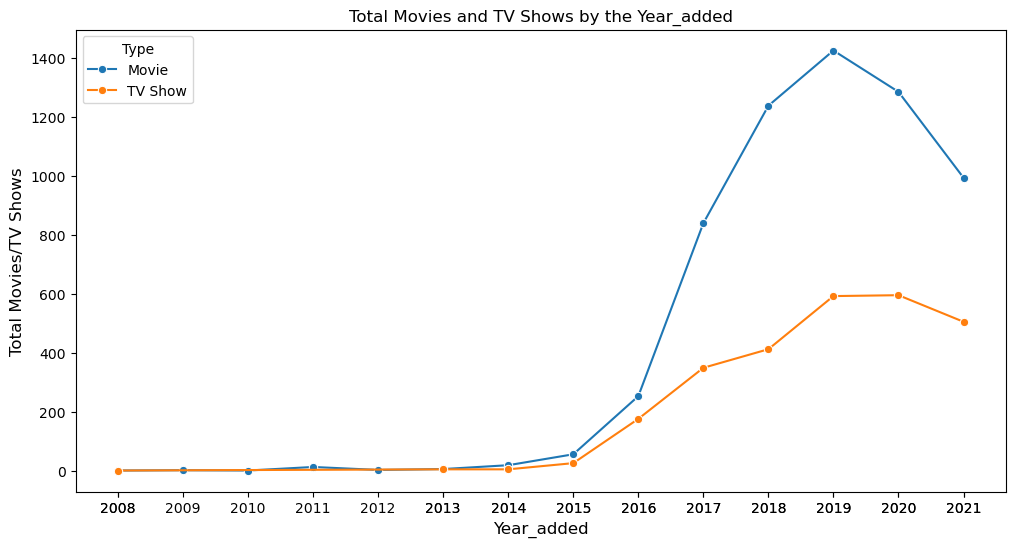

In [68]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'Type', marker = 'o'  , ms = 6)
plt.xlabel('Year_added' , fontsize = 12)
plt.ylabel('Total Movies/TV Shows' , fontsize = 12)
plt.xticks(d['year_added'])
plt.title('Total Movies and TV Shows by the Year_added' , fontsize = 12)
plt.show()

In [69]:
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d = d.rename({'show_id' : 'total movies/TV shows', 'type':'Type'}, axis = 1)

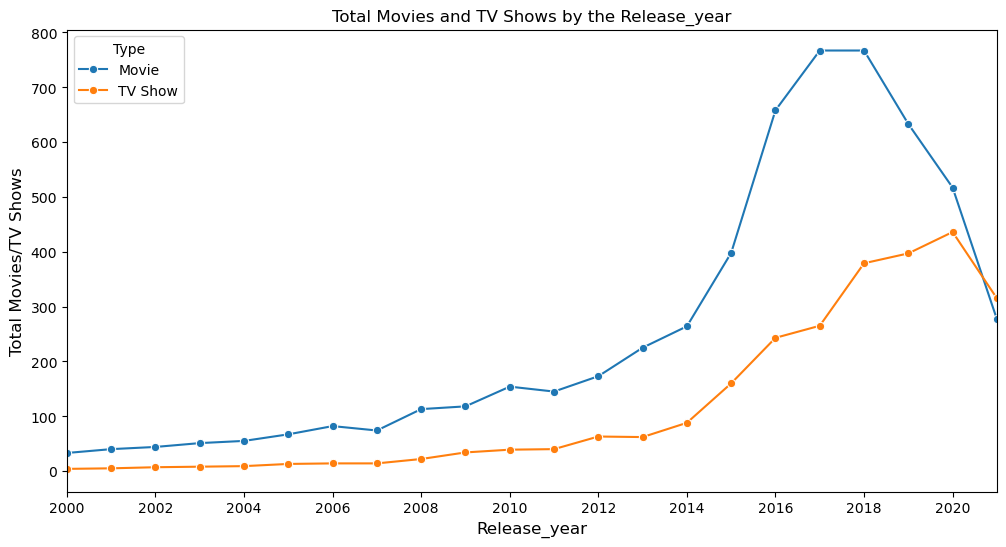

In [70]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'Type' , marker = 'o'  , ms = 6 )
plt.xlabel('Release_year' , fontsize = 12)
plt.ylabel('Total Movies/TV Shows' , fontsize = 12)
plt.title('Total Movies and TV Shows by the Release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

In [71]:
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]

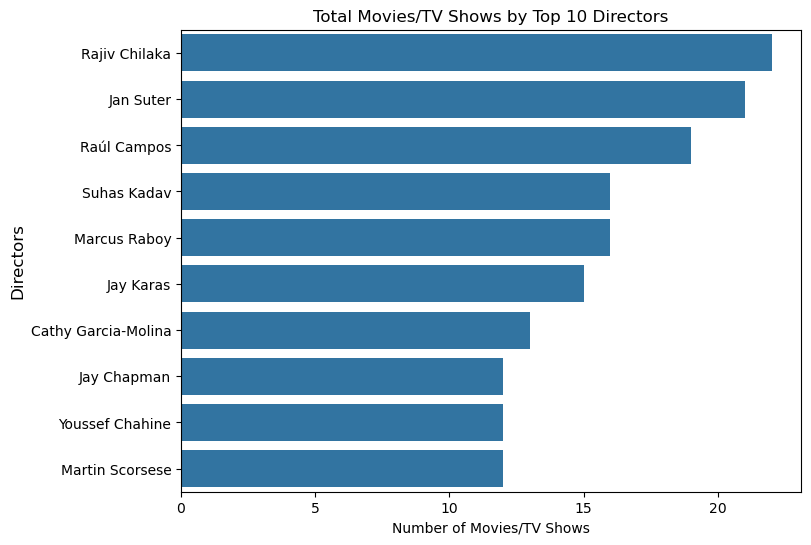

In [72]:
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v')
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total Movies/TV Shows by Top 10 Directors')
plt.show()

In [73]:
x = dir_tb.director.value_counts()
x

director
Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: count, Length: 4993, dtype: int64

In [74]:
def calculate_outliers(data):
    # Calculate the first quartile (Q1)
    q1 = np.percentile(data, 25)
    
    # Calculate the third quartile (Q3)
    q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers in the dataset
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    
    return outliers


def calculate_max_occurred_value(data):
    # Calculate the unique values and their counts in the dataset
    unique_values, value_counts = np.unique(data, return_counts=True)
    
    # Find the index of the maximum count
    max_count_index = np.argmax(value_counts)
    
    # Retrieve the corresponding unique value with the maximum count
    max_occurred_value = unique_values[max_count_index]
    
    return max_occurred_value

In [75]:
outliers = calculate_outliers(x)  
max_occurred_value = calculate_max_occurred_value(x) 
set(outliers)

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 21, 22}

In [76]:
max_occurred_value

1

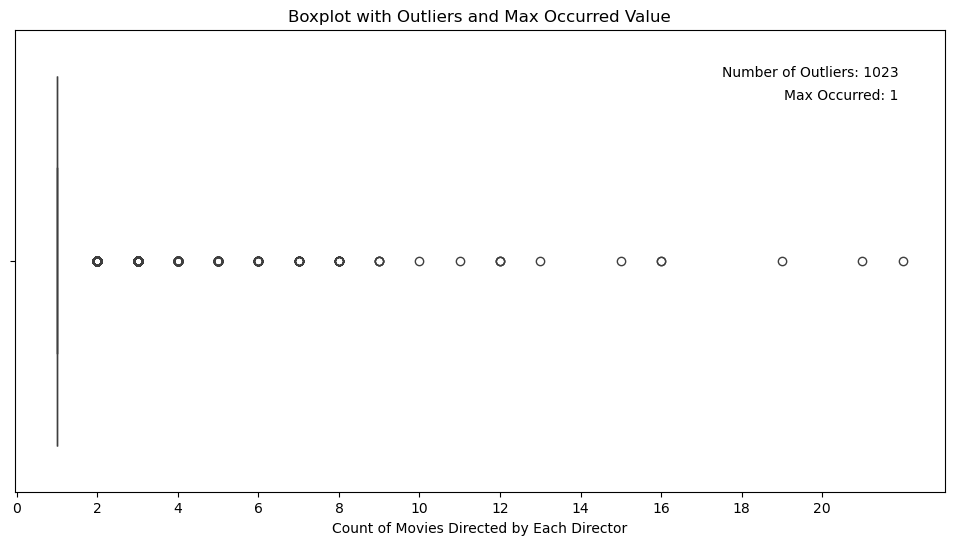

In [77]:
plt.figure(figsize = (12,6))
sns.boxplot(data=x, showfliers=True, whis=1.5 , orient = 'h')

outliers = calculate_outliers(x)  
max_occurred_value = calculate_max_occurred_value(x)  

# Annotate the plot
plt.text(0.95, 0.9, f"Number of Outliers: {len(outliers)}", transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f"Max Occurred: {max_occurred_value}", transform=plt.gca().transAxes, ha='right')


plt.xlabel("Count of Movies Directed by Each Director")
plt.xticks(np.arange(0,22,2))
plt.title("Boxplot with Outliers and Max Occurred Value")


plt.show()

In [78]:
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]

In [79]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752,932
India,962,84
United Kingdom,534,271
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


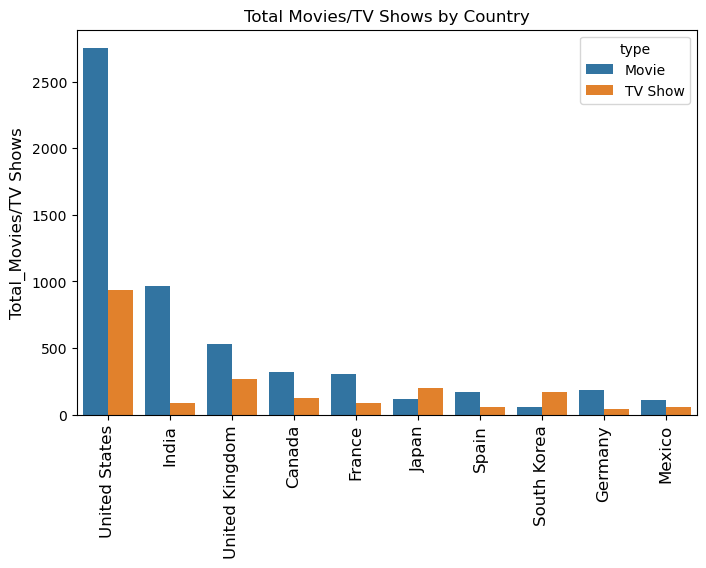

In [80]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('Total_Movies/TV Shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total Movies/TV Shows by Country')
plt.show()

In [81]:
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

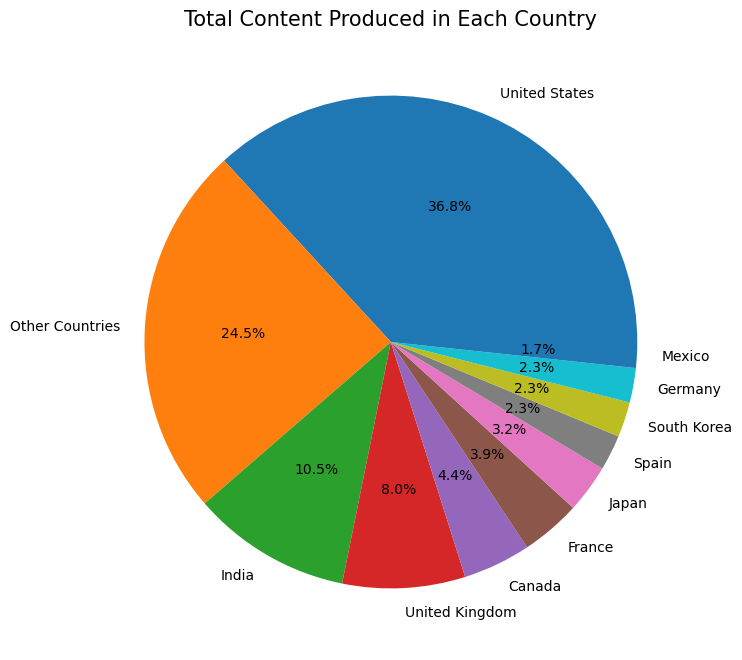

In [82]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content Produced in Each Country' , fontsize = 15)
plt.show()

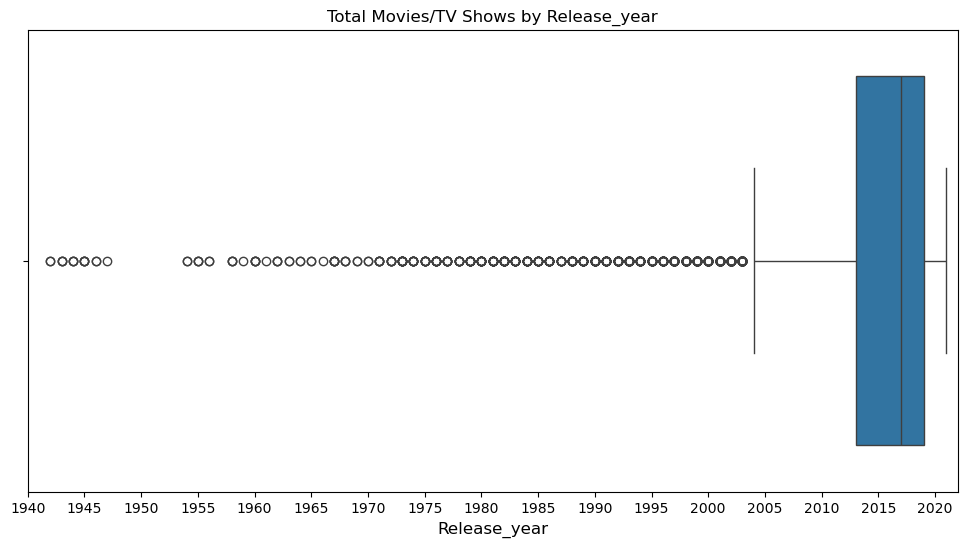

In [83]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('Release_year' , fontsize = 12)
plt.title('Total Movies/TV Shows by Release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

In [84]:
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()

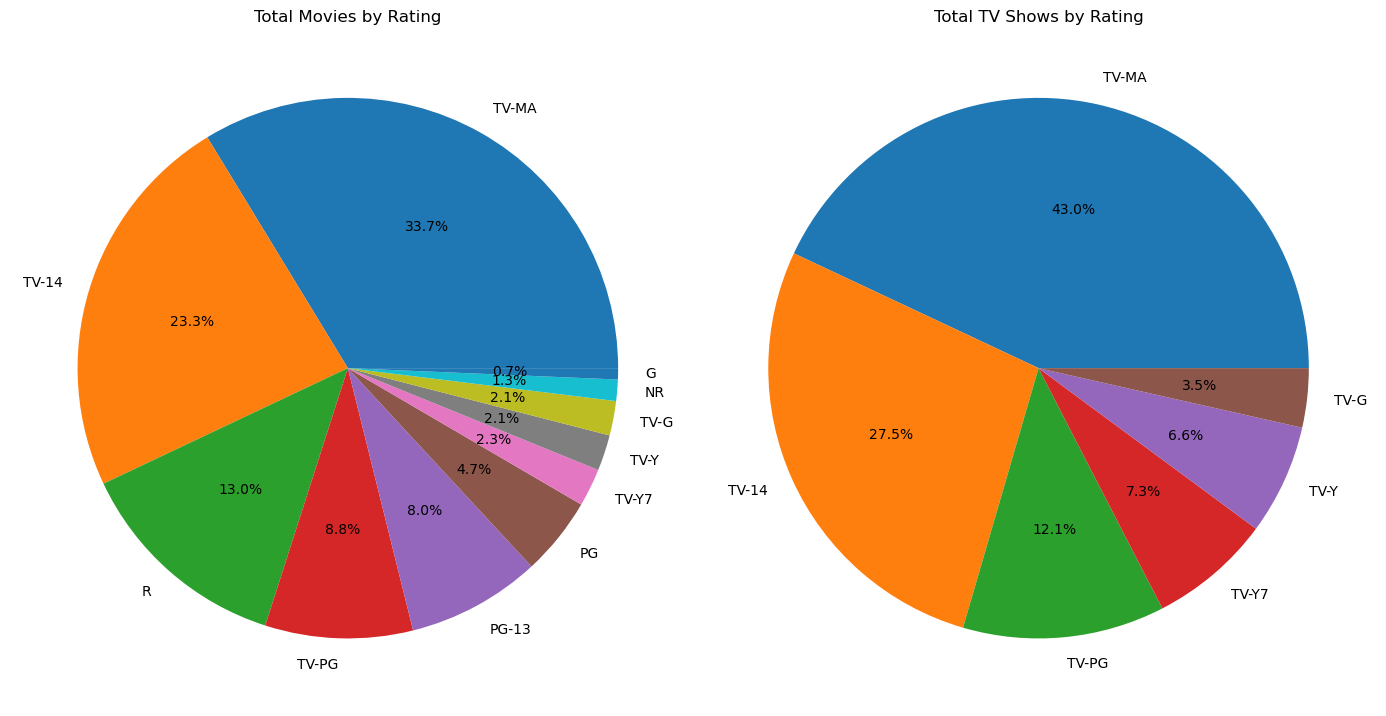

In [85]:
fig, ax = plt.subplots(1,2, figsize=(14,12))
ax[0].pie(m, labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total Movies by Rating')

ax[1].pie(t, labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total TV Shows by Rating')

plt.tight_layout()
plt.show()

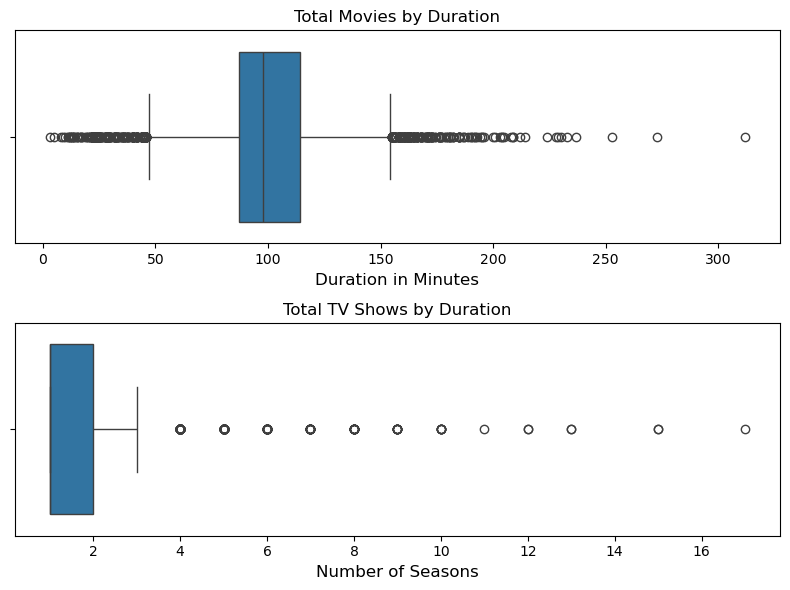

In [86]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = movies , x = 'duration_in_minutes' ,ax =ax[0])
ax[0].set_xlabel('Duration in Minutes' ,  fontsize = 12)
ax[0].set_title('Total Movies by Duration')

sns.boxplot (data = tv_shows , x = 'duration_in_seasons' , ax = ax[1])
ax[1].set_xlabel('Number of Seasons' ,  fontsize = 12)
ax[1].set_title('Total TV Shows by Duration')

plt.tight_layout()
plt.show()

In [87]:
top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]

In [88]:
top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]

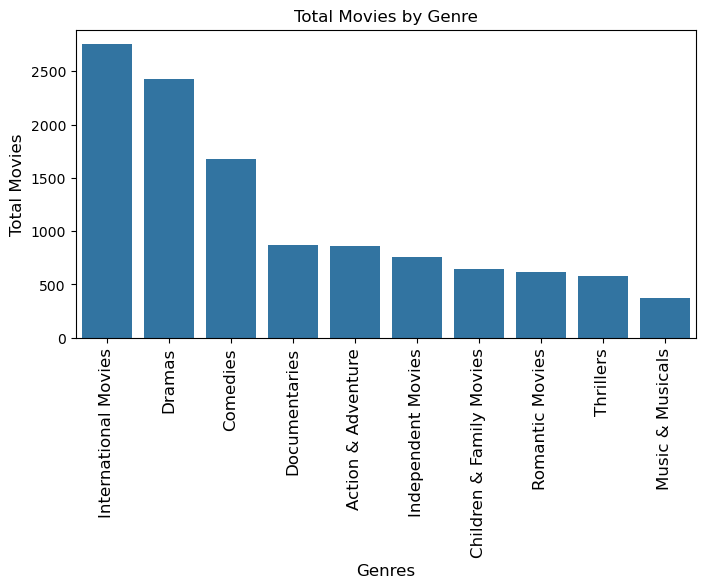

In [89]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('Total Movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total Movies by Genre')
plt.show()

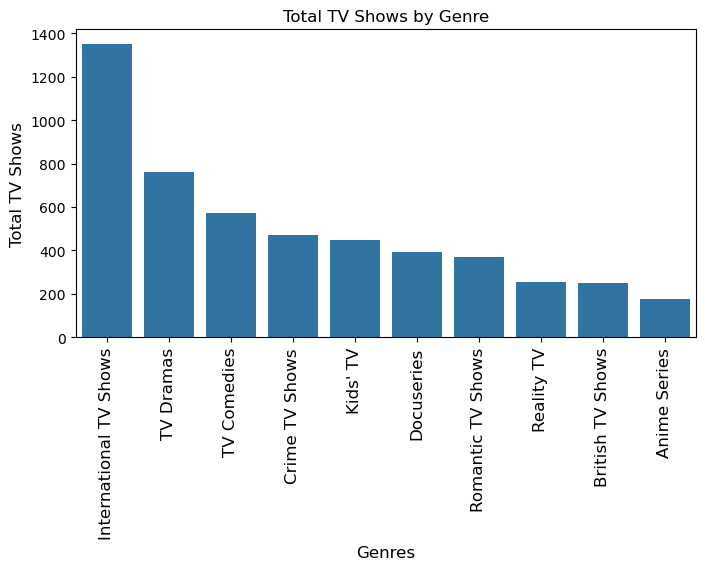

In [90]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('Total TV Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total TV Shows by Genre')
plt.show()